# Imports
All the imports are at the top of the file

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

## 1. Read and display the image.

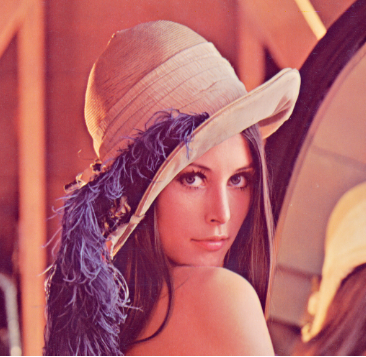

In [ ]:
image_colored = Image.open("/content/drive/MyDrive/AI last sem/worksheet1/lenna_image.png")
display(image_colored)

## 2. Display only the top left corner of 100x100 pixels

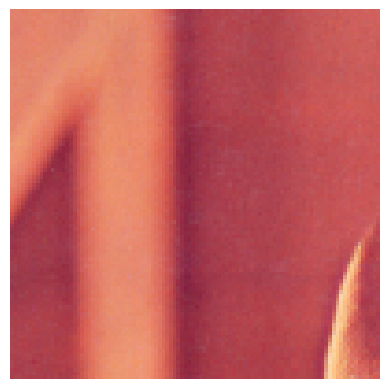

In [ ]:
image_colored_array = np.array(image_colored)

corner = image_colored_array[:100, :100]
plt.imshow(corner)
plt.axis('off')
plt.show()

## 3. Show the three color channels (R,G,B)

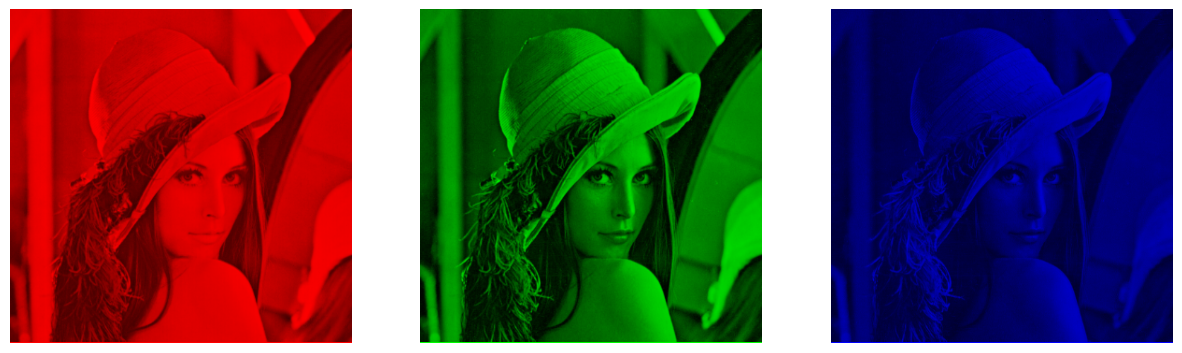

In [ ]:
red_channel = image_colored_array.copy()

red_channel[:, :, 1] = 0
red_channel[:, :, 2] = 0

green_channel = image_colored_array.copy()

green_channel[:, :, 0] = 0
green_channel[:, :, 2] = 0

blue_channel = image_colored_array.copy()

blue_channel[:, :, 0] = 0
blue_channel[:, :, 1] = 0

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(red_channel)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green_channel)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blue_channel)
plt.axis('off')

plt.show()

## 4. Modify the top 100x100 pixels to a value of 210 and dislay the resulting image

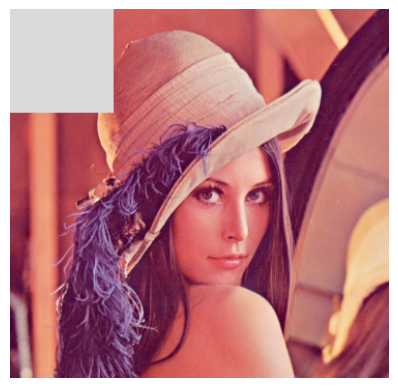

In [ ]:
image_with_grey_corner = image_colored_array.copy()

image_with_grey_corner[:100, :100] = 210

plt.imshow(image_with_grey_corner)
plt.axis('off')
plt.show()

# Exercise 2

## 1. Load and display a grayscale image

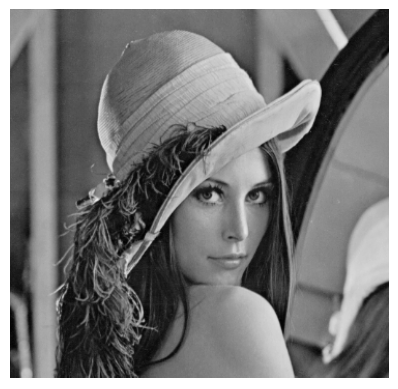

In [ ]:
image_grayed = image_colored.convert("L")

plt.imshow(image_grayed,cmap="grey")
plt.axis("off")
plt.show()

## 2. Extract and display the middle section of the image

(150, 150)


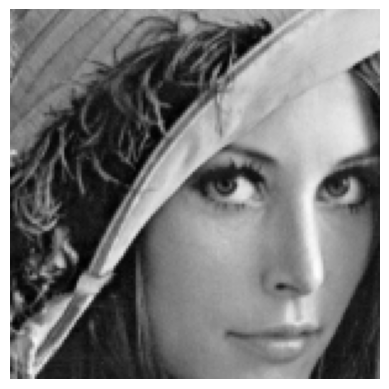

In [ ]:
image_grayed_array = np.array(image_grayed)

height, width = image_grayed_array.shape

crop_size = 150


# If we divide the width by half we will get the center of the image so we will offset it with 150 pixels
crop_start_x = (width - crop_size) // 2
crop_end_x = crop_start_x + crop_size

# Same as width
crop_start_y = (height - crop_size) // 2
crop_end_y = crop_start_y + crop_size

cropped_image = image_grayed_array[crop_start_x:crop_end_x, crop_start_y:crop_end_y]


print(cropped_image.shape)
plt.imshow(cropped_image, cmap="gray")
plt.axis("off")
plt.show()

3. Apply a simple threshold to the image set all the pixels below 100 to 0 and all values above 100 to 255

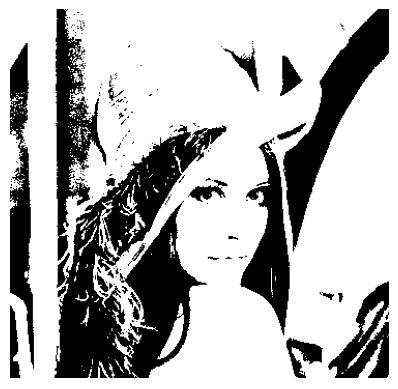

In [ ]:
threshold_image = np.where(image_grayed_array < 100,0,255)

plt.imshow(threshold_image, cmap="gray")
plt.axis("off")
plt.show()

## 4. Roate the image 90 degrees clockwise and display the result

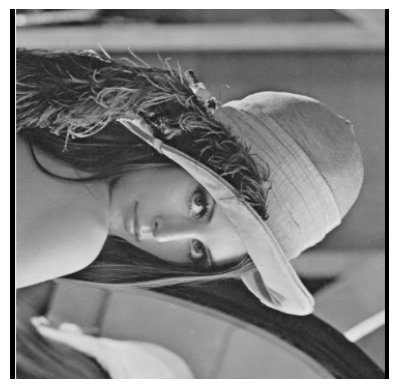

In [ ]:
rotated_90 = image_grayed.rotate(-90)

plt.imshow(rotated_90, cmap="gray")
plt.axis("off")
plt.show()

## 5. Convert the grayscale image to an RGB image

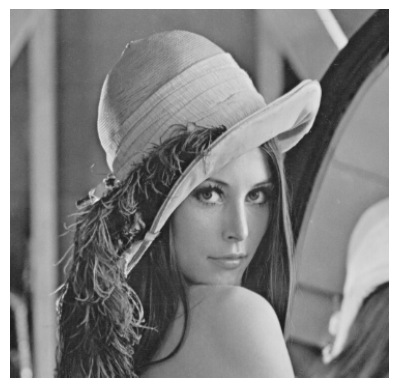

In [ ]:
# the array of image grayed creates a depth of three of the same values
rbg_gray_image = np.stack([ image_grayed_array ] * 3, axis=-1)

plt.imshow(rbg_gray_image)
plt.axis("off")
plt.show()

# Exercise 3

## 1. Load and Prepare Data:
* Fetch an image of you choice.{If colour convert to grayscale}
* Center the dataset - Standaridze the Data.
* Calculate the covaraince matrix of the Standaridze data.

357 366


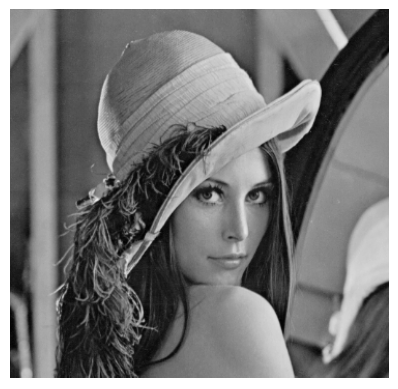

In [ ]:
print(height,width)

plt.imshow(image_grayed,cmap="grey")
plt.axis("off")
plt.show()

In [ ]:
mean = np.mean(image_grayed_array,axis=0)

centered_array =  image_grayed_array - mean
cov_matrix = np.cov(centered_array,rowvar=False)

print(cov_matrix.shape)

(366, 366)


## 2. Eigen Decomposition and Identifying Principal Components:
* Compute Eigen Values and Eigen Vectors.

* Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues.

* Identify the Principal Components with the help of cumulative Sum plot.

In [ ]:
eigen_values, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigen_values)[::-1]

eigen_values = eigen_values[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

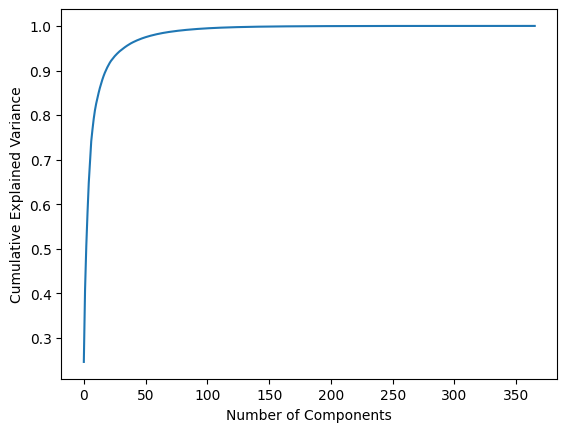

In [ ]:
explained_variance_ratio = eigen_values / np.sum(eigen_values)
cum_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(cum_explained_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

## 3. Reconstruction and experiment
* Reconstruction: Transform the original data by multiplying it with the selected eigenvec-
tors(PCs) to obtain a lower-dimensional representation.

* Experiments: Pick Four different combination of principal components with various ex-
plained variance value and compare the result.

* Display the Results and Evaluate.

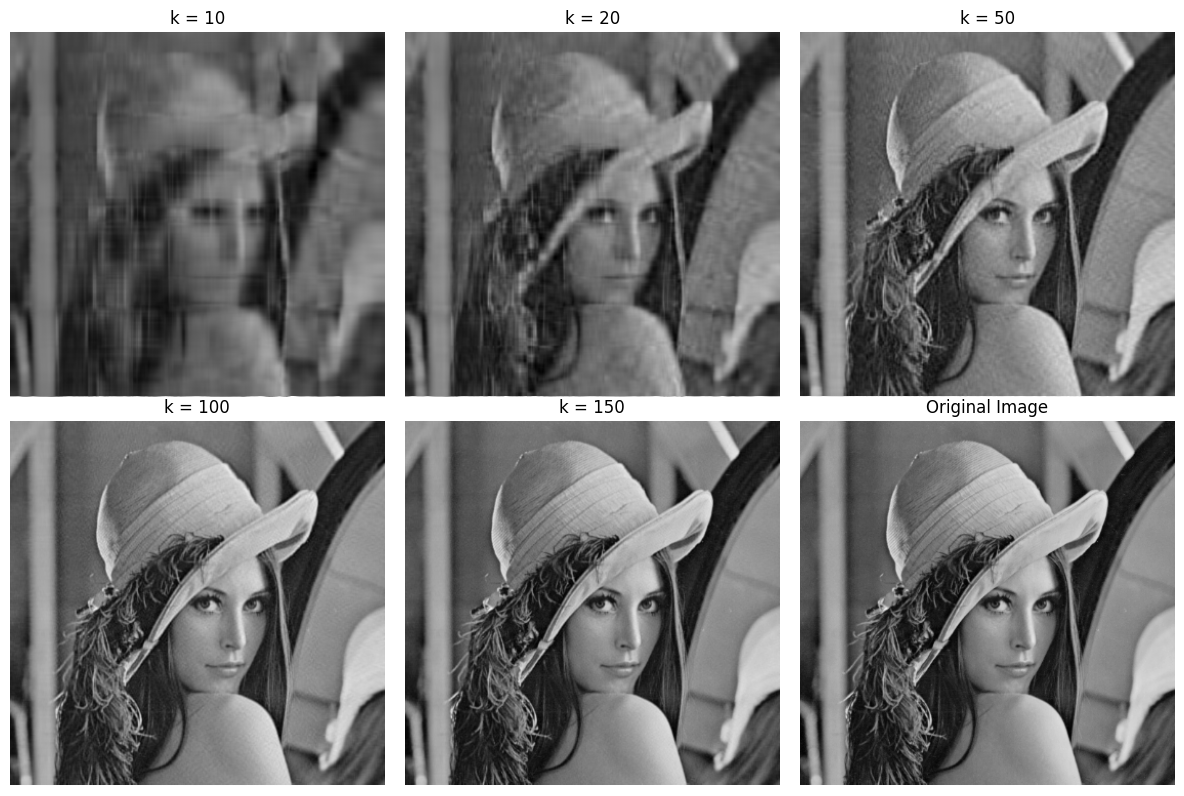

In [93]:
k = [10,20,50,100,150]
plt.figure(figsize=(12, 8))


for index, k_val in enumerate(k):
  components = eigenvectors[:,:k_val]
  compressed_image = np.dot(centered_array,components)

  decompressed_image = np.dot(compressed_image,components.T) + mean

  plt.subplot(2, 3, index + 1)
  plt.imshow(decompressed_image,cmap="gray")
  plt.title(f"k = {k_val}")

  plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(image_grayed,cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.tight_layout()
plt.show()